In [ ]:
# installing kaggle library
! pip install kaggle


In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Collecting Data**

In [ ]:
# API  to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 95% 77.0M/80.9M [00:00<00:00, 176MB/s]
100% 80.9M/80.9M [00:00<00:00, 147MB/s]


In [ ]:
#Extracting the compressing dataset

from zipfile import ZipFile

# Specify the dataset path
dataset = '/content/sentiment140.zip'

# Extract the dataset
with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall('/content')
     # Specify the extraction folder

print("Dataset extracted successfully!")


Dataset extracted successfully!



# **Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**Setting up the environment**

In [ ]:
import pandas as pd

# Load the dataset with a specified encoding
file_path = '/content/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
  df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.shape


(1599999, 6)

In [ ]:
# Display the first few rows to confirm it loaded correctly
print(df.head())

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [ ]:
print(df.tail())

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
1599994  AmandaMarie1028   
1599995      TheWDBoards   
1599996           bpbabe   
1599997     tinydiamondz   
1599998   RyanTrevMorris   

        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1599994  Just woke up. Having no school is the best fee...                                                                   
1599995  TheWDB.com - Very cool to hear old Walt interv...                                                                   
1599996  Are you ready for your MoJo Makeover? Ask me f.

In [ ]:
# Naming the columns and  reading the dataset again
column_names=['target','id','date','flag','user','text']
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=column_names,encoding='latin-1')


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [ ]:
print(df.dtypes)


target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object


In [ ]:
print(df.describe())

             target            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


# **Data cleaning and Data Preprocessing**

In [ ]:
# counting number of missing values
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


 **Handling duplicates and missing values**





In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Check the shape of the DataFrame to see how many rows were removed
print(f"DataFrame shape after removing duplicates: {df.shape}")


DataFrame shape after removing duplicates: (1600000, 6)


In [ ]:
# Drop rows with any missing values
df = df.dropna()

# Check the shape of the DataFrame
print(f"DataFrame shape after dropping missing values: {df.shape}")


DataFrame shape after dropping missing values: (1600000, 6)




**Text normalization-**




In [ ]:
import re
def normalize_text(text):
   text = text.lower()
   text = re.sub(r'[^\w\s]', '', text)
   return text
df['normalized_text'] = df['text'].apply(normalize_text)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text', 'normalized_text'], dtype='object')


**stopwords-**

In [ ]:
# stopwords
# Import necessary modules
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '


**Tokenization-**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Download the necessary NLTK data (only if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenization and stop word removal
df['tokens'] = df['normalized_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Check the result
print(df[['normalized_text', 'tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                     normalized_text  \
0  switchfoot httptwitpiccom2y1zl  awww thats a b...   
1  is upset that he cant update his facebook by t...   
2  kenichan i dived many times for the ball manag...   
3    my whole body feels itchy and like its on fire    
4  nationwideclass no its not behaving at all im ...   

                                              tokens  
0  [switchfoot, httptwitpiccom2y1zl, awww, thats,...  
1  [upset, cant, update, facebook, texting, might...  
2  [kenichan, dived, many, times, ball, managed, ...  
3            [whole, body, feels, itchy, like, fire]  
4    [nationwideclass, behaving, im, mad, cant, see]  


In [ ]:
import pandas as pd

# Example text column is 'cleaned_text'
# 1. Post length (number of words)
df['post_length'] = df['normalized_text'].apply(lambda x: len(x.split()))

# 2. Hashtag count (number of hashtags in the post)
df['hashtag_count'] = df['normalized_text'].apply(lambda x: x.count('#'))

# 3. Mention count (number of mentions '@username' in the post)
df['mention_count'] = df['normalized_text'].apply(lambda x: x.count('@'))

# 4. URL count (number of URLs in the post)
df['url_count'] = df['normalized_text'].apply(lambda x: x.count('http'))

# Check the newly created columns
print(df[['normalized_text', 'post_length', 'hashtag_count', 'mention_count', 'url_count']].head())


                                     normalized_text  post_length  \
0  switchfoot httptwitpiccom2y1zl  awww thats a b...           18   
1  is upset that he cant update his facebook by t...           21   
2  kenichan i dived many times for the ball manag...           18   
3    my whole body feels itchy and like its on fire            10   
4  nationwideclass no its not behaving at all im ...           21   

   hashtag_count  mention_count  url_count  
0              0              0          1  
1              0              0          0  
2              0              0          0  
3              0              0          0  
4              0              0          0  


In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text', 'normalized_text',
       'tokens', 'post_length', 'hashtag_count', 'mention_count', 'url_count'],
      dtype='object')

In [ ]:
# checking the target column
df['target'].value_counts()

,count
target,
0,800000
4,800000


### **Converting the target "4" to "1"**


*   0 ---> Negative tweet
*   1 ---> Positive tweet



In [ ]:
# Replace values in the 'target' column
df.replace({'target': {4: 1}}, inplace=True)


df['target'].value_counts()

,count
target,
0,800000
1,800000


# **Exploratory Data Analysis (EDA)**

**Analyze Posting Patterns**

<ipython-input-39-1b4c2aa5422f>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


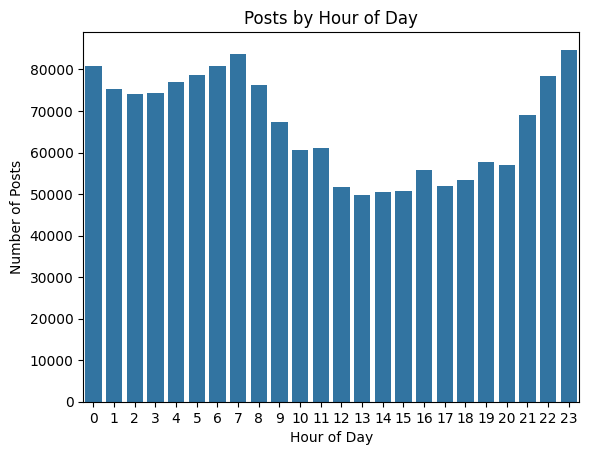

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract useful time-based features
df['hour'] = df['date'].dt.hour  # Extract hour of day
df['day_of_week'] = df['date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['date'].dt.month  # Extract month

# Plot the distribution of posts by hour of the day
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='hour')
plt.title('Posts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.show()


**User Activity Analysis**

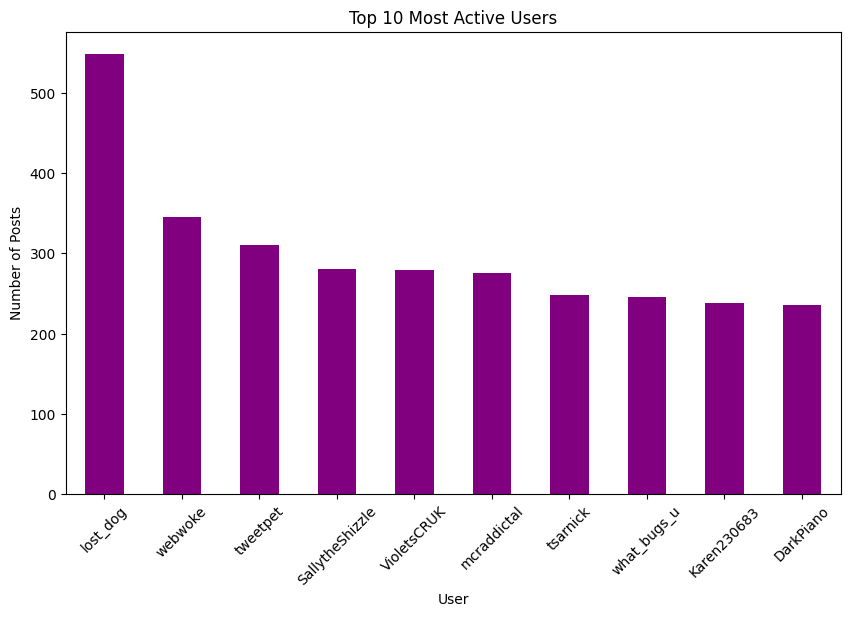

In [ ]:
# Group by 'user' to count how many posts each user has
user_activity = df['user'].value_counts()

# Top 10 most active users
top_users = user_activity.head(10)

# Plot top 10 most active users
top_users.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Most Active Users')
plt.xlabel('User')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


**Engagement Analysist**

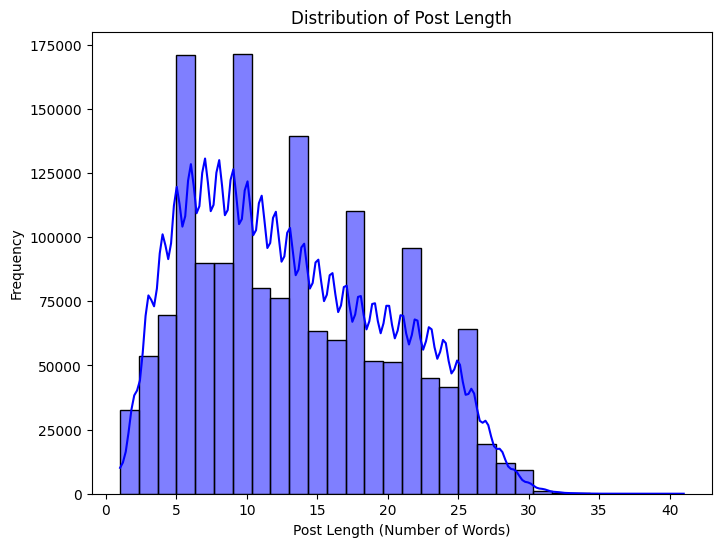

In [ ]:
# Analyzing engagement based on post length
plt.figure(figsize=(8, 6))
sns.histplot(df['post_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Post Length')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


**Visualization**

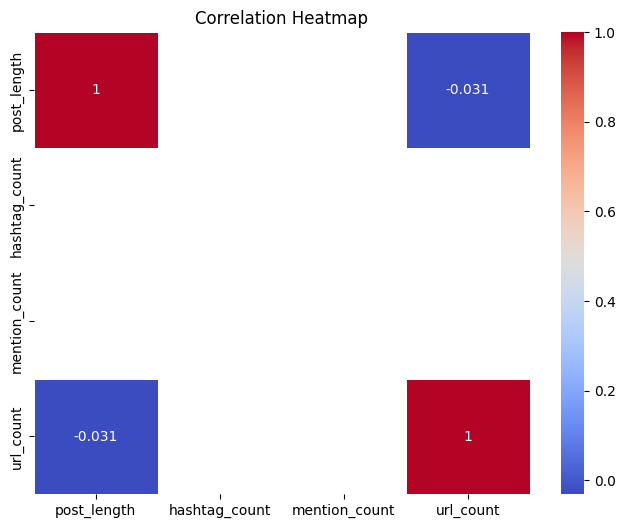

In [ ]:
# Visualize correlations between numeric features
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_columns = ['post_length', 'hashtag_count', 'mention_count', 'url_count']

# Plot the correlation matrix
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Trend Identification**

**Time Series Analysis Using pandas and matplotlib**

 - Using pandas for data aggregation by time periods
 - Using matplotlib for time series visualization



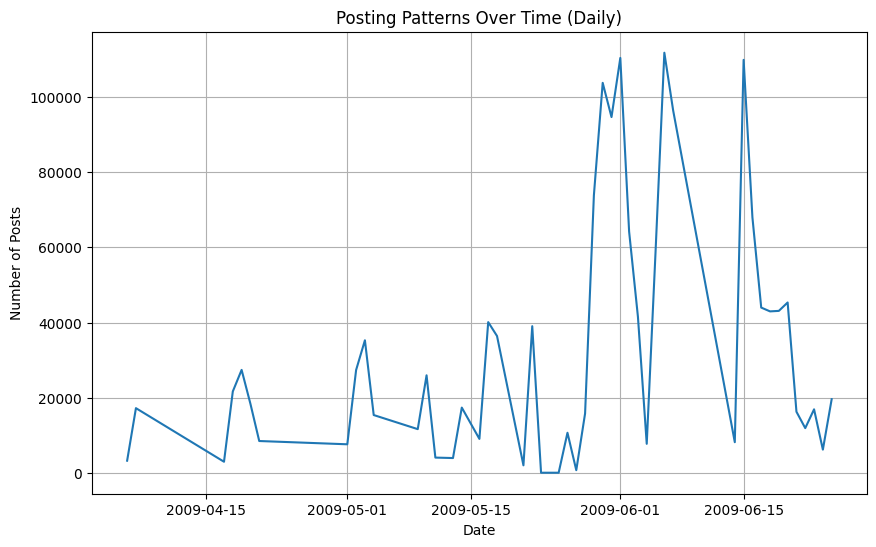

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column contains the timestamp of the posts
df['date'] = pd.to_datetime(df['date'])

# Group by date to see posting trends over time (daily)
df_daily = df.groupby(df['date'].dt.date).size()

# Plot the posting patterns
plt.figure(figsize=(10,6))
df_daily.plot()
plt.title('Posting Patterns Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


**Change Point Detection Using ruptures**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00


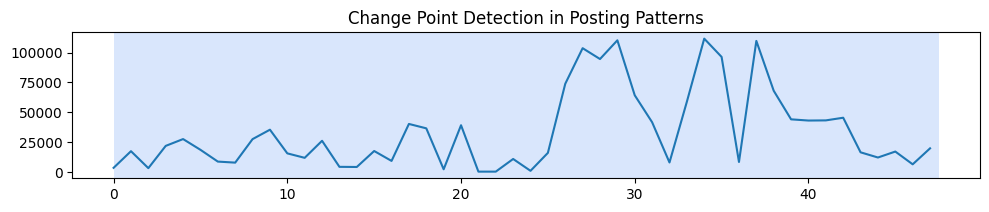

In [ ]:
!pip install ruptures

import ruptures as rpt

# Convert daily post count to a list
series = df_daily.values

# Initialize a change point detection model
model = rpt.Pelt(model="rbf").fit(series)

# Specify a penalty or threshold for detection
breakpoints = model.predict(pen=10)

# Plot the time series and detected change points
rpt.display(series, breakpoints)
plt.title('Change Point Detection in Posting Patterns')
plt.show()


**Word Cloud for Trending Terms**

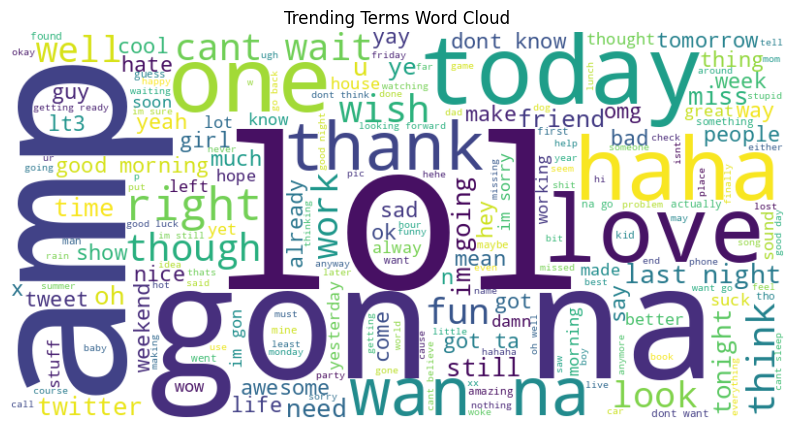

In [ ]:
from wordcloud import WordCloud

# Combine all tokenized words into a single string
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens']])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Terms Word Cloud')
plt.show()


**Trend Line Plots**

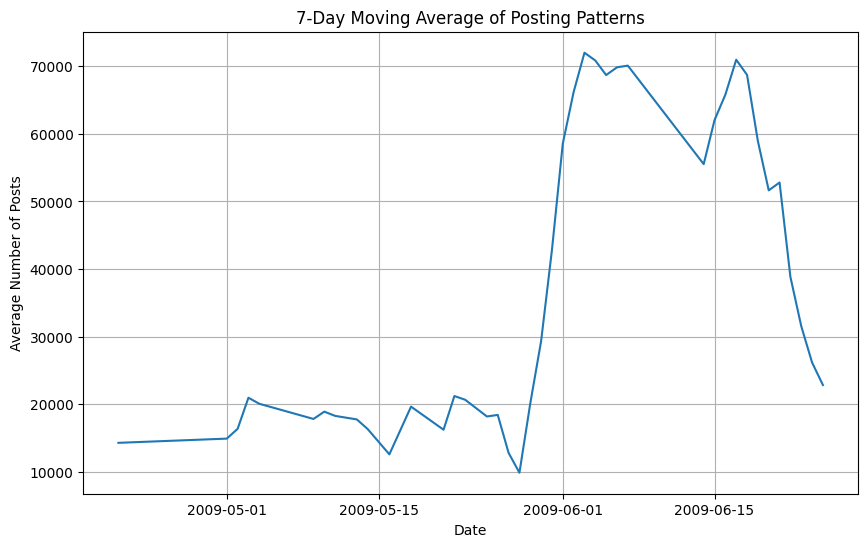

In [ ]:
# Using moving averages to smooth time series for trends
df_daily_rolling = df_daily.rolling(window=7).mean()  # 7-day moving average

# Plot the trend line
plt.figure(figsize=(10,6))
df_daily_rolling.plot()
plt.title('7-Day Moving Average of Posting Patterns')
plt.xlabel('Date')
plt.ylabel('Average Number of Posts')
plt.grid(True)
plt.show()


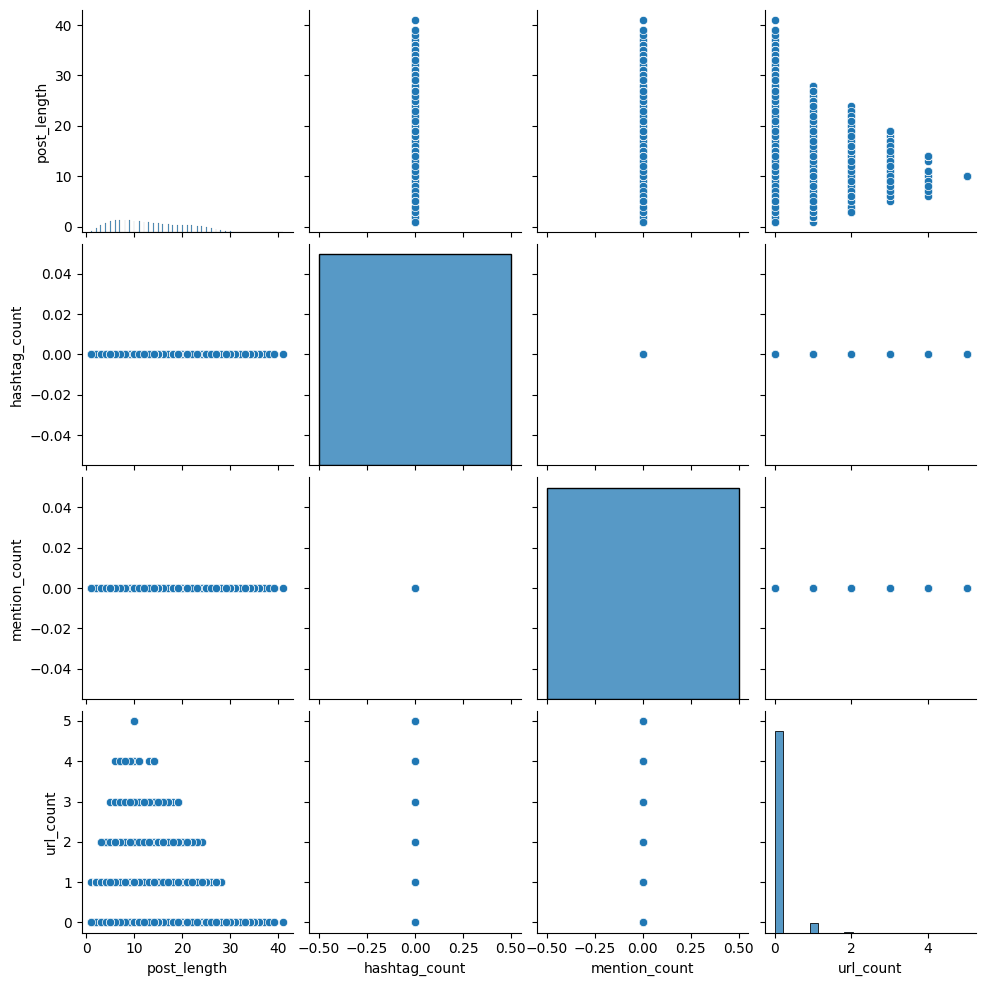

In [ ]:
# Example: Pair plot between selected numerical columns
sns.pairplot(df[['post_length', 'hashtag_count', 'mention_count', 'url_count']])
plt.show()


#### **Stemming**

In [ ]:
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content=re.sub('{^a-zA-Z}',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Initialize PorterStemmer
port_stem = PorterStemmer()
# Define the stemming function
def stemming(content):
    # Remove any character that is not a letter
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)

    # Convert text to lowercase
    stemmed_content = stemmed_content.lower()

    # Split the text into words
    stemmed_content = stemmed_content.split()

    # Stem each word and remove stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]

    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content


In [ ]:
df['stemmed_content']=df['text'].apply(stemming)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'normalized_text', 'tokens', 'post_length', 'hashtag_count',
       'mention_count', 'url_count', 'stemmed_content', 'hour', 'day_of_week',
       'month'],
      dtype='object')

In [ ]:
df.head()

,target,id,date,flag,user,text,cleaned_text,normalized_text,tokens,post_length,hashtag_count,mention_count,url_count,stemmed_content,hour,day_of_week,month
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...,switchfoot httptwitpiccom2y1zl awww thats a b...,"[thats, bummer, shoulda, got, david, carr, thi...",16,0,0,0,switchfoot http twitpic com zl awww bummer sho...,22,0,4
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might...",21,0,0,0,upset updat facebook text might cri result sch...,22,0,4
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,kenichan i dived many times for the ball manag...,"[dived, many, times, ball, managed, save, 50, ...",17,0,0,0,kenichan dive mani time ball manag save rest g...,22,0,4
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]",10,0,0,0,whole bodi feel itchi like fire,22,0,4
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,nationwideclass no its not behaving at all im ...,"[behaving, im, mad, cant, see]",20,0,0,0,nationwideclass behav mad see,22,0,4


In [ ]:
print(df['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(df['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


# **Predictive Modeling**

**Feature preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# seperating the data and the label
X=df['stemmed_content'].values
Y=df['target'].values


In [ ]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


**Model training**

### spilting the data to training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(X_train)

  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (1279996, 434014)	0.27189450523324465
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.35212500999832036
  (1279996, 23807

In [ ]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(Y_train)

[1 1 0 ... 1 1 0]


In [ ]:
print(Y_test)

[0 1 0 ... 1 0 1]


In [ ]:
# Converting the textual data to numerical data

vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [ ]:
print(X_train)

  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (1279996, 434014)	0.27189450523324465
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.35212500999832036
  (1279996, 23807

In [ ]:
print(X_test)

  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538
  (319995, 107868)	0.33399349737546963
  (319995, 109379)	0.3020896484890833
  (319995, 155493)	0.2770682832971669
  (319995, 2133

# Training the Machine learing model

*   Logistic Regression




In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

 **Model evaluation**

### Accuracy score

In [ ]:
# accuracy score on the training data

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy score on the training data:',training_data_accuracy)

Accuracy score on the training data: 0.79871953125


In [ ]:
# accuracy score on the test data

X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

print('Accuracy score on the test data:',test_data_accuracy)

Accuracy score on the test data: 0.77668125


Model Accuracy = 77.6%

Saving the trained model

In [ ]:
import pickle

filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

Using the Saved Model for Future Predictions

In [ ]:
# loading the saved model

loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [ ]:
X_new=X_test[200]
print(Y_test[200])

prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('Negative Tweet')
else:
  print('Positive Tweet')

1
[1]
Positive Tweet


In [ ]:
X_new=X_test[3]
print(Y_test[3])

prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('Negative Tweet')
else:
  print('Positive Tweet')

0
[0]
Negative Tweet


**Model Evaluation and Tuning**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print(confusion_matrix(Y_test, X_test_prediction))

# Classification Report
print(classification_report(Y_test, X_test_prediction))


[[121246  38754]
 [ 32708 127292]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Ensure text data is converted to numerical features
vectorizer = TfidfVectorizer()

# Extract text data (X) and labels (Y)
X = df['stemmed_content'].values  # Ensure this is text data
Y = df['target'].values  # Ensure this is the label data (e.g., 0 or 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Vectorize the training and testing data
X_train = vectorizer.fit_transform(X_train)  # Convert text data to numerical form
X_test = vectorizer.transform(X_test)

# Set up parameter grid for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# Run GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and print them
print('Best Params:', grid_search.best_params_)

# Evaluate the model with the best parameters on test data
X_test_prediction = grid_search.best_estimator_.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on the test data:', test_data_accuracy)


Best Params: {'C': 1, 'solver': 'liblinear'}
Accuracy score on the test data: 0.7779875


# **Advanced Visualization**

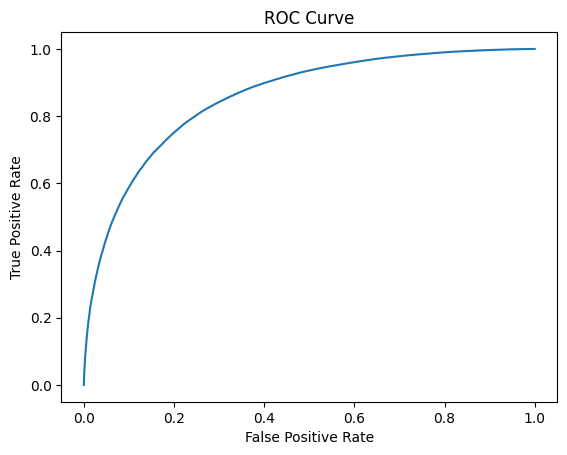

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming your LogisticRegression model is named 'log_reg_model' to avoid conflict with 'Pelt'
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, Y_train)

# Now plot the ROC curve with the correct logistic regression model
fpr, tpr, thresholds = roc_curve(Y_test, log_reg_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
df.head()

,target,id,date,flag,user,text,cleaned_text,normalized_text,tokens,post_length,hashtag_count,mention_count,url_count,stemmed_content,hour,day_of_week,month
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...,switchfoot httptwitpiccom2y1zl awww thats a b...,"[thats, bummer, shoulda, got, david, carr, thi...",16,0,0,0,switchfoot http twitpic com zl awww bummer sho...,22,0,4
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might...",21,0,0,0,upset updat facebook text might cri result sch...,22,0,4
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,kenichan i dived many times for the ball manag...,"[dived, many, times, ball, managed, save, 50, ...",17,0,0,0,kenichan dive mani time ball manag save rest g...,22,0,4
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]",10,0,0,0,whole bodi feel itchi like fire,22,0,4
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,nationwideclass no its not behaving at all im ...,"[behaving, im, mad, cant, see]",20,0,0,0,nationwideclass behav mad see,22,0,4


from matplotlib import pyplot as plt
_df_42['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['post_length'].plot(kind='hist', bins=20, title='post_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_44.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_45.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_46.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_47.groupby('normalized_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='id', y='post_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['post_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('post_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['post_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('post_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['post_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_51.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cleaned_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='cleaned_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('post_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['post_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_52.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('normalized_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='normalized_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('post_length')

from matplotlib import pyplot as plt
_df_53['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['post_length'].plot(kind='line', figsize=(8, 4), title='post_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_55.groupby('user')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleaned_text'].value_counts()
    for x_label, grp in _df_56.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('cleaned_text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['normalized_text'].value_counts()
    for x_label, grp in _df_57.groupby('cleaned_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cleaned_text')
_ = plt.ylabel('normalized_text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['stemmed_content'].value_counts()
    for x_label, grp in _df_58.groupby('normalized_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('normalized_text')
_ = plt.ylabel('stemmed_content')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_59['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_59, x='id', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_60['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_60, x='id', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_61['cleaned_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_61, x='id', y='cleaned_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_62['normalized_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_62, x='id', y='normalized_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)